In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import plotly.express as px
import matplotlib.pyplot as plt

In [2]:
#Mount google drive,uncomment below if running in collab, change path accordingly
from google.colab import drive
drive.mount('/content/drive',force_remount = True)

Mounted at /content/drive


In [3]:
business_json_path = '/content/drive/MyDrive/COMP9727/COMP9727 Restaurant-recommder System/business_philadelphia.json'

In [4]:
business = pd.read_json(business_json_path, lines=True,
dtype={'business_id':str,'name':str,'address':str,'city':str,'state':str,
       'postal_code':str,'latitude':float,'longitude':float,'stars':int,
       'review_count':int,'is_open': bool,'attributes':str,'categories':str,'hours':str})

In [ ]:
#Visualise loaded dataframe
business.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4,80,True,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
1,MUTTqe8uqyMdBl186RmNeA,Tuna Bar,205 Race St,Philadelphia,PA,19106,39.953949,-75.143226,4,245,True,"{'RestaurantsReservations': 'True', 'Restauran...","Sushi Bars, Restaurants, Japanese","{'Tuesday': '13:30-22:0', 'Wednesday': '13:30-..."
2,ROeacJQwBeh05Rqg7F6TCg,BAP,1224 South St,Philadelphia,PA,19147,39.943223,-75.162568,4,205,True,"{'NoiseLevel': ""u'quiet'"", 'GoodForMeal': ""{'d...","Korean, Restaurants","{'Monday': '11:30-20:30', 'Tuesday': '11:30-20..."
3,QdN72BWoyFypdGJhhI5r7g,Bar One,767 S 9th St,Philadelphia,PA,19147,39.939825,-75.157447,4,65,False,"{'Smoking': ""u'no'"", 'NoiseLevel': ""u'average'...","Cocktail Bars, Bars, Italian, Nightlife, Resta...","{'Monday': '16:0-0:0', 'Tuesday': '16:0-0:0', ..."
4,Mjboz24M9NlBeiOJKLEd_Q,DeSandro on Main,4105 Main St,Philadelphia,PA,19127,40.022466,-75.218314,3,41,False,"{'RestaurantsReservations': 'False', 'Caters':...","Pizza, Restaurants, Salad, Soup","{'Tuesday': '17:0-21:30', 'Wednesday': '17:0-1..."


In [ ]:
#Original dataframe has below shape
business.shape

(5853, 14)

**Pre-process/Clean dataset:**
Lets drop the restaurants that are not open anymore.
Lets drop the columns that are not required for our task.Columns like  'city','state', 'postal_code' are not required.Also column 'is_open' will have value as 'True' only after dropping closed ones, therefore not significant to keep it.

In [ ]:
#Only keep businesses that are open
business = business[business['is_open']== True]
business.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4,80,True,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
1,MUTTqe8uqyMdBl186RmNeA,Tuna Bar,205 Race St,Philadelphia,PA,19106,39.953949,-75.143226,4,245,True,"{'RestaurantsReservations': 'True', 'Restauran...","Sushi Bars, Restaurants, Japanese","{'Tuesday': '13:30-22:0', 'Wednesday': '13:30-..."
2,ROeacJQwBeh05Rqg7F6TCg,BAP,1224 South St,Philadelphia,PA,19147,39.943223,-75.162568,4,205,True,"{'NoiseLevel': ""u'quiet'"", 'GoodForMeal': ""{'d...","Korean, Restaurants","{'Monday': '11:30-20:30', 'Tuesday': '11:30-20..."
5,aPNXGTDkf-4bjhyMBQxqpQ,Craft Hall,901 N Delaware Ave,Philadelphia,PA,19123,39.962582,-75.135657,3,65,True,"{'OutdoorSeating': 'True', 'RestaurantsPriceRa...","Eatertainment, Arts & Entertainment, Brewpubs,...","{'Monday': '0:0-0:0', 'Wednesday': '16:0-22:0'..."
6,ppFCk9aQkM338Rgwpl2F5A,Wawa,3604 Chestnut St,Philadelphia,PA,19104,39.954573,-75.194894,3,56,True,"{'Alcohol': ""u'none'"", 'RestaurantsGoodForGrou...","Restaurants, Automotive, Delis, Gas Stations, ...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W..."


In [ ]:
#Number of open restaurants
business.shape

(3526, 14)

In [ ]:
#drop unnecessary columns
business = business.drop(['city','state','postal_code','is_open'],axis =1)
business.head()

,business_id,name,address,latitude,longitude,stars,review_count,attributes,categories,hours
0,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,39.955505,-75.155564,4,80,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
1,MUTTqe8uqyMdBl186RmNeA,Tuna Bar,205 Race St,39.953949,-75.143226,4,245,"{'RestaurantsReservations': 'True', 'Restauran...","Sushi Bars, Restaurants, Japanese","{'Tuesday': '13:30-22:0', 'Wednesday': '13:30-..."
2,ROeacJQwBeh05Rqg7F6TCg,BAP,1224 South St,39.943223,-75.162568,4,205,"{'NoiseLevel': ""u'quiet'"", 'GoodForMeal': ""{'d...","Korean, Restaurants","{'Monday': '11:30-20:30', 'Tuesday': '11:30-20..."
5,aPNXGTDkf-4bjhyMBQxqpQ,Craft Hall,901 N Delaware Ave,39.962582,-75.135657,3,65,"{'OutdoorSeating': 'True', 'RestaurantsPriceRa...","Eatertainment, Arts & Entertainment, Brewpubs,...","{'Monday': '0:0-0:0', 'Wednesday': '16:0-22:0'..."
6,ppFCk9aQkM338Rgwpl2F5A,Wawa,3604 Chestnut St,39.954573,-75.194894,3,56,"{'Alcohol': ""u'none'"", 'RestaurantsGoodForGrou...","Restaurants, Automotive, Delis, Gas Stations, ...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W..."


In [ ]:
#checking details of restaurant that has maximum review_counts, interestingly it does not have 5 stars rating.
business[business['review_count'] == 5721]

,business_id,name,address,latitude,longitude,stars,review_count,attributes,categories,hours
5549,ytynqOUb3hjKeJfRj5Tshw,Reading Terminal Market,51 N 12th St,39.953341,-75.158855,4,5721,"{'RestaurantsGoodForGroups': 'True', 'Restaura...","Candy Stores, Shopping, Department Stores, Fas...","{'Monday': '8:0-18:0', 'Tuesday': '8:0-18:0', ..."


To make the 'stars' /ranking of the business more sensical. Let's find the minimum numbers of review_count the restaurant needs to have for 'stars' to be considered as measure of ranking. We will drop the restaurants that has below 10th percentile of the review count.And will only use restaurants that has higher than 10th percentile of review counts.

In [ ]:
#find range of review_count
min_value,max_value = business['review_count'].min(), business['review_count'].max()
print(f"Minumum review_count: {min_value}, Maximum review_count: {max_value}")

Minumum review_count: 5, Maximum review_count: 5721


In [ ]:
#find 10th percentile value of review_count
tenth_percentile = np.percentile(business['review_count'].to_numpy(),10)
ninetyfifth_percentile = np.percentile(business['review_count'].to_numpy(),95)
mean_review_count = business['review_count'].mean()
print(f'Tenth percentile: {tenth_percentile}, Ninetyfifth percentile: {ninetyfifth_percentile},Mean: {mean_review_count}')

Tenth percentile: 8.0, Ninetyfifth percentile: 564.0,Mean: 140.51049347702778


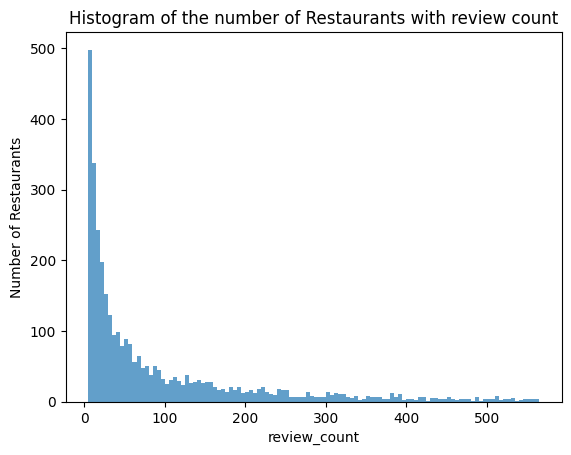

In [ ]:
plt.hist(business['review_count'],bins=np.arange(min_value,ninetyfifth_percentile +min_value, min_value),alpha = 0.7)
# Adding labels and title
plt.xlabel('review_count')
plt.ylabel('Number of Restaurants')
plt.title('Histogram of the number of Restaurants with review count')
plt.show()

In [ ]:
#drop restaurants that has less than or equal to tenth_percentile numbers of review_count
business = business[business['review_count'] >= tenth_percentile]
print(f"Minumum review_count: {business['review_count'].min()}, Maximum review_count: {business['review_count'].max()}")
business.shape

Minumum review_count: 8, Maximum review_count: 5721


(3202, 10)

In [ ]:
#final dataframe after pre-processing
business.head()

,business_id,name,address,latitude,longitude,stars,review_count,attributes,categories,hours
0,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,39.955505,-75.155564,4,80,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
1,MUTTqe8uqyMdBl186RmNeA,Tuna Bar,205 Race St,39.953949,-75.143226,4,245,"{'RestaurantsReservations': 'True', 'Restauran...","Sushi Bars, Restaurants, Japanese","{'Tuesday': '13:30-22:0', 'Wednesday': '13:30-..."
2,ROeacJQwBeh05Rqg7F6TCg,BAP,1224 South St,39.943223,-75.162568,4,205,"{'NoiseLevel': ""u'quiet'"", 'GoodForMeal': ""{'d...","Korean, Restaurants","{'Monday': '11:30-20:30', 'Tuesday': '11:30-20..."
5,aPNXGTDkf-4bjhyMBQxqpQ,Craft Hall,901 N Delaware Ave,39.962582,-75.135657,3,65,"{'OutdoorSeating': 'True', 'RestaurantsPriceRa...","Eatertainment, Arts & Entertainment, Brewpubs,...","{'Monday': '0:0-0:0', 'Wednesday': '16:0-22:0'..."
6,ppFCk9aQkM338Rgwpl2F5A,Wawa,3604 Chestnut St,39.954573,-75.194894,3,56,"{'Alcohol': ""u'none'"", 'RestaurantsGoodForGrou...","Restaurants, Automotive, Delis, Gas Stations, ...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W..."


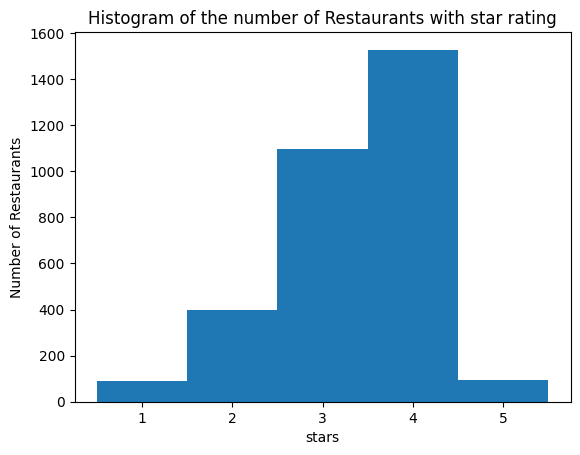

In [ ]:
#Lets plot the star rating distribution of restaurants
plt.hist(business['stars'],bins=range(1,7),align = 'left')
# Adding labels and title
plt.xlabel('stars')
plt.ylabel('Number of Restaurants')
plt.title('Histogram of the number of Restaurants with star rating')
plt.show()

Lets plot the location of each business in a map for visualisation.

In [ ]:
!pip install plotly


In [ ]:
def plot_data(restaurant_location):
  #convert restaurant_locations to list of tuples
  restaurant_loc = [tuple(x) for x in restaurant_location.to_numpy()]
  color_scale = [(0, 'orange'), (1,'red')]

  fig = px.scatter_mapbox(restaurant_location,
                          lat="latitude",
                          lon="longitude",
                          hover_name="name",
                          hover_data=["address","stars"],
                          color_continuous_scale=color_scale,
                          zoom=10,
                          height=600,
                          width=600)

  fig.update_layout(mapbox_style="open-street-map")
  fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
  fig.show()
#
plot_data(business)

In [ ]:
user_location ={'name':'User','address' : '767 S 9th St','latitude': 40.10663,'longitude':-75.315447}
business = business.append(user_location,ignore_index = True)

<ipython-input-20-8f5f37373f18>:2: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [ ]:
# to drop a particular row: restaurant_location = restaurant_location[restaurant_location['address'] != 'S 9th St']
business.tail()

,business_id,name,address,latitude,longitude,stars,review_count,attributes,categories,hours
3198,auwFZzfhe2pvFw43OfsAfw,Stina Pizzeria,1705 Snyder Ave,39.925205,-75.174728,4.0,112.0,"{'DogsAllowed': 'False', 'RestaurantsTakeOut':...","Pizza, Restaurants, Mediterranean","{'Tuesday': '16:0-22:0', 'Wednesday': '16:0-22..."
3199,K1SsvIPfFcHniNSPc3IG7g,Flip-N-Pizza,1308 W Girard Ave,39.970720,-75.157752,4.0,16.0,"{'WiFi': ""u'no'"", 'BYOB': 'False', 'Restaurant...","Restaurants, American (Traditional), Chicken W...","{'Monday': '0:0-0:0', 'Tuesday': '15:0-1:30', ..."
3200,wVxXRFf10zTTAs11nr4xeA,PrimoHoagies,6024 Ridge Ave,40.032483,-75.214430,3.0,55.0,"{'NoiseLevel': ""u'average'"", 'RestaurantsTakeO...","Restaurants, Specialty Food, Food, Sandwiches,...","{'Monday': '10:0-21:0', 'Tuesday': '10:0-21:0'..."
3201,WnT9NIzQgLlILjPT0kEcsQ,Adelita Taqueria & Restaurant,1108 S 9th St,39.935982,-75.158665,4.0,35.0,"{'WheelchairAccessible': 'False', 'Restaurants...","Restaurants, Mexican","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'..."
3202,NaN,User,767 S 9th St,40.106630,-75.315447,NaN,NaN,NaN,NaN,NaN


**DBSCAN**

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors


In [ ]:
coords = business[['latitude','longitude']]

In [ ]:
neigh = NearestNeighbors(n_neighbors=2,algorithm = 'ball_tree',metric ='haversine')
nbrs = neigh.fit(np.radians(coords))
distances, indices = nbrs.kneighbors(coords)
distances.shape

(3203, 2)

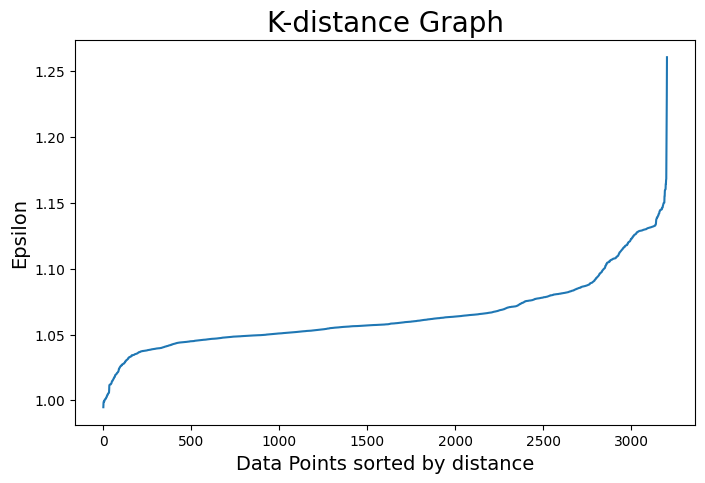

In [ ]:
# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(8,5))
plt.plot(distances)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

From visual inspection of above K-distance Graph, the knee of the graph is at about 1.1. Therefore, value of epsilon is selected as 1.1 KMs

In [ ]:
kms_per_radian = 6371.0088
epsilon = 1.1/ kms_per_radian
db = DBSCAN(eps=epsilon, min_samples=12, algorithm='ball_tree', metric='haversine').fit(np.radians(coords))
cluster_labels = db.labels_
num_clusters = len(set(cluster_labels))
clusters = pd.Series([coords[cluster_labels == n] for n in range(num_clusters)])
print('Number of clusters: {}'.format(num_clusters))




Number of clusters: 10


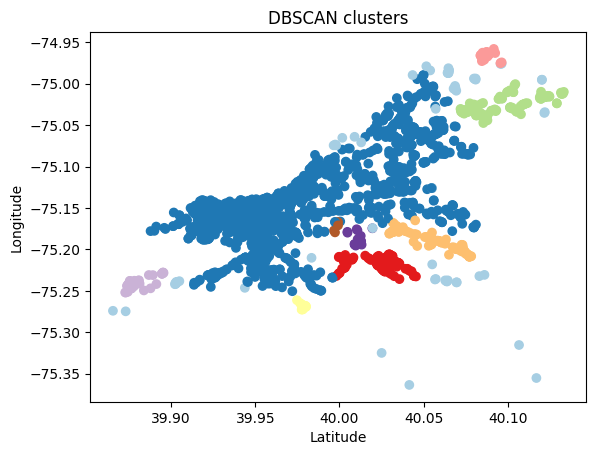

In [ ]:
plt.scatter(coords['latitude'],coords['longitude'],c=cluster_labels, cmap='Paired')
plt.title("DBSCAN clusters")
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()

Using K-distance graph and DBclustering algorithm we get optimum value of cluster for this dataset as 8. The clustering from DBcluster in above figure shows that there are noise points and in case if the user is also in noise cluster then recommending restaurants from noise cluster will recommend restaurants that are far away. Therefore, we will use number of clusters obtained from DBcluster in KMeans clustering and provide recommendations based on KMeans clustering.

**KMeans Clustering**

In [ ]:
kmeans_clustering = KMeans(n_clusters=num_clusters, random_state=0, n_init="auto").fit(np.radians(coords))
kmeans_cluster = kmeans_clustering.labels_

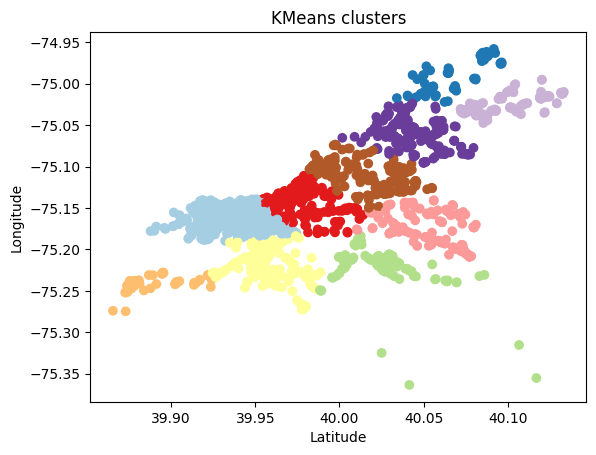

In [ ]:
plt.scatter(coords['latitude'],coords['longitude'],c=kmeans_cluster, cmap='Paired')
plt.title("KMeans clusters")
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()

The clusters in above figure shows that the restaurants that are in close proximity are in same cluster. The 3 data points in green cluster that are far away from other datapoints belongs to the same cluster that are closest to them.

In [ ]:
business['cluster'] = kmeans_cluster
business.head()

,business_id,name,address,latitude,longitude,stars,review_count,attributes,categories,hours,cluster
0,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,39.955505,-75.155564,4.0,80.0,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...",0
1,MUTTqe8uqyMdBl186RmNeA,Tuna Bar,205 Race St,39.953949,-75.143226,4.0,245.0,"{'RestaurantsReservations': 'True', 'Restauran...","Sushi Bars, Restaurants, Japanese","{'Tuesday': '13:30-22:0', 'Wednesday': '13:30-...",4
2,ROeacJQwBeh05Rqg7F6TCg,BAP,1224 South St,39.943223,-75.162568,4.0,205.0,"{'NoiseLevel': ""u'quiet'"", 'GoodForMeal': ""{'d...","Korean, Restaurants","{'Monday': '11:30-20:30', 'Tuesday': '11:30-20...",0
3,aPNXGTDkf-4bjhyMBQxqpQ,Craft Hall,901 N Delaware Ave,39.962582,-75.135657,3.0,65.0,"{'OutdoorSeating': 'True', 'RestaurantsPriceRa...","Eatertainment, Arts & Entertainment, Brewpubs,...","{'Monday': '0:0-0:0', 'Wednesday': '16:0-22:0'...",4
4,ppFCk9aQkM338Rgwpl2F5A,Wawa,3604 Chestnut St,39.954573,-75.194894,3.0,56.0,"{'Alcohol': ""u'none'"", 'RestaurantsGoodForGrou...","Restaurants, Automotive, Delis, Gas Stations, ...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W...",8


In [ ]:
#Get user's cluster
user = business[business['name']== 'User']
user_cluster = user['cluster'].to_numpy()
print(user_cluster)

[2]


In [ ]:
#Get recommendations as restaurants that are in user's cluster
recommendation = business[business['cluster'] == user_cluster[0]]
recommendation.head()
recommendation.shape

(165, 11)

In [ ]:
rec = recommendation.sort_values(by = ['stars','review_count'],ascending = False)
rec.head(),rec.shape

(                 business_id                          name         address  \
 1123  dUrtFfHBz15Q4GiyDFAqUw             New Ridge Brewing  6168 Ridge Ave   
 2756  m3yoaIO2ulbRs4kUX6GS9w                 Haggerty Deli   4528 Wilde St   
 2313  4MQpxMnXusrCkqKgvEZHXw              Halal Food Truck  6193 Ridge Ave   
 306   faSi7EoZ38xMPJEpp7-pqg         Algorithm Restaurants                   
 997   n-WO5netYEXLiC6bBJrF4A  The Basement Board Game Cafe  6109 Ridge Ave   
 
        latitude  longitude  stars  review_count  \
 1123  40.034931 -75.217059    5.0          54.0   
 2756  40.029168 -75.225595    5.0          19.0   
 2313  40.031943 -75.213393    5.0          14.0   
 306   40.116933 -75.355294    5.0          10.0   
 997   40.033895 -75.215446    5.0           8.0   
 
                                              attributes  \
 1123  {'OutdoorSeating': 'True', 'NoiseLevel': "u'av...   
 2756  {'RestaurantsTakeOut': 'True', 'BusinessParkin...   
 2313  {'BusinessParking': "{'

In [ ]:
final_rec = rec.head()
print('The final recommendations are :\n')
final_rec

The final recommendations are :



,business_id,name,address,latitude,longitude,stars,review_count,attributes,categories,hours,cluster
1123,dUrtFfHBz15Q4GiyDFAqUw,New Ridge Brewing,6168 Ridge Ave,40.034931,-75.217059,5.0,54.0,"{'OutdoorSeating': 'True', 'NoiseLevel': ""u'av...","Restaurants, Gastropubs, Breweries, Food",None,2
2756,m3yoaIO2ulbRs4kUX6GS9w,Haggerty Deli,4528 Wilde St,40.029168,-75.225595,5.0,19.0,"{'RestaurantsTakeOut': 'True', 'BusinessParkin...","Convenience Stores, Food, Restaurants, Delis","{'Tuesday': '9:0-18:0', 'Wednesday': '9:0-18:0...",2
2313,4MQpxMnXusrCkqKgvEZHXw,Halal Food Truck,6193 Ridge Ave,40.031943,-75.213393,5.0,14.0,"{'BusinessParking': ""{'garage': False, 'street...","Food Trucks, Food, Restaurants, Halal",None,2
306,faSi7EoZ38xMPJEpp7-pqg,Algorithm Restaurants,,40.116933,-75.355294,5.0,10.0,"{'OutdoorSeating': 'True', 'BusinessParking': ...","Food, Food Trucks, Pop-Up Restaurants, Busines...","{'Monday': '12:0-17:0', 'Tuesday': '12:0-21:0'...",2
997,n-WO5netYEXLiC6bBJrF4A,The Basement Board Game Cafe,6109 Ridge Ave,40.033895,-75.215446,5.0,8.0,"{'GoodForMeal': ""{'dessert': False, 'latenight...","Cafes, Restaurants, Hobby Shops, Shopping","{'Wednesday': '18:0-22:0', 'Thursday': '18:0-2...",2


In [ ]:
final_rec = final_rec.append(user_location,ignore_index = True)
#show recommendations on map
plot_data(final_rec)

<ipython-input-35-436829192edb>:1: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

